In [1]:
from refnx.dataset import Data1D
from refnx.dataset import ReflectDataset
import refnx
import data_in
data = data_in.data_in('d2o/29553_54.dat')
print(data)
# dataset = data # ...
data = Data1D(data) 
print(data)

ModuleNotFoundError: No module named 'refnx.dataset'

In [3]:
from refnx.reflect import SLD, Erf
# simple setup, no tilt, equation or checking
air = SLD(value=0+0j, name='air')
polymer = SLD(1,'polymer')
polymer.thick.setp(vary=True, bounds=(2, 30))
water = SLD(2,'water')
structure = air(thick=0,rough=0) | polymer(200,4) | water(0,3)
 #air-polymer roughness of 4, polymer size of 200
 #Erf()  <-error function
structure[1].interfaces = Erf() # air-polymer interface
structure[2].interfaces = Erf()
print(structure)

________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
Parameters:      'air'     
<Parameter: 'air - thick' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'air - sld'  , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter: 'air - isld'  , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter: 'air - rough' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air - volfrac solvent', value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters:    'polymer'   
<Parameter:'polymer - thick', value=200 (fixed)  , bounds=[-inf, inf]>
<Parameter:'polymer - sld', value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:'polymer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'polymer - rough', value=4 (fixed)  , bounds=[-inf, inf]>
<Par

In [4]:
from refnx.reflect import ReflectModel
model = ReflectModel(structure, bkg=0, dq=0)
model.scale.setp(vary=True, bounds=(-1, 1.5))
model.bkg.setp(vary=True,bounds=(-1, 1.5))
#print(model)

In [5]:
from refnx.analysis import CurveFitter, Objective
objective = Objective(model, data)
fitter = CurveFitter(objective)
fitter.fit('differential_evolution')
print(objective,'\n')
#print(fitter)

________________________________________________________________________________
Objective - 2767933145040
Dataset = <None>, 68 points
datapoints = 68
chi2 = 604290.1857181352
Weighted = True
Transform = None
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1.5 +/- 0.0192, bounds=[-1, 1.5]>
<Parameter:     'bkg'     , value=5.69409e-06 +/- 7.05e-08, bounds=[-1, 1.5]>
<Parameter:'dq - resolution', value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:      'air'     
<Parameter: 'air - thick' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'air - sld'  , value=0 (fixed)  , bounds=[-inf, inf]

<IPython.core.display.Javascript object>


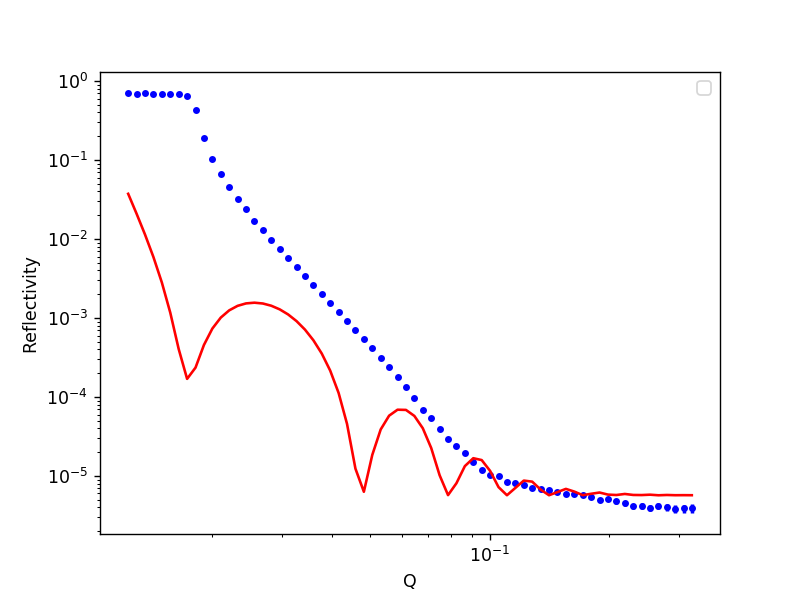

No handles with labels found to put in legend.


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
objective.plot()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Q')
plt.ylabel('Reflectivity')
plt.legend();